# HyperParameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [3]:
data = './input/data.csv'
df = pd.read_csv(data)

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
df.diagnosis.value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Оскільки стовпці "Unnamed: 32" та "id" не містять необхідної для аналізу інформації, то видалимо їх

In [7]:
df.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [8]:
df[df.isnull().any(axis=1)]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Перетворимо категоріальну змінну на числову за допомогою трансформації даних: там, де прогноз пухлини є злоякісним (Malignant) – буде значення 1, а там, де доброякісним (Benign) – значення 0.

In [10]:
print("Malignant = 1, Benign = 0")
df["diagnosis"]= df["diagnosis"].map(lambda row: 1 if row=='M' else 0)
df.head()

Malignant = 1, Benign = 0


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


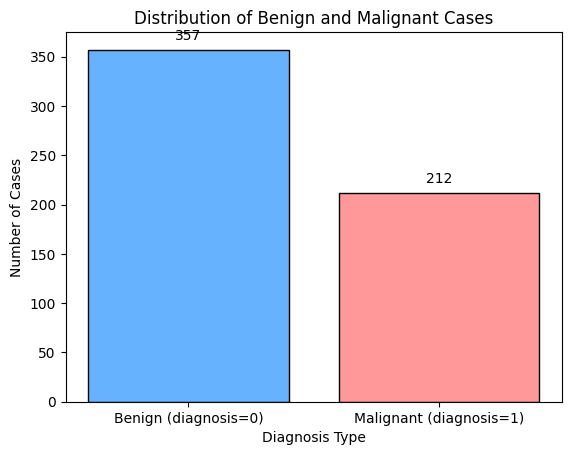

In [12]:
y_counts = df["diagnosis"].value_counts()
labels = ['Benign (diagnosis=0)', 'Malignant (diagnosis=1)']

fig, ax = plt.subplots()

ax.bar(labels, y_counts, color=['#66B2FF', '#FF9999'], edgecolor='black')

plt.xlabel('Diagnosis Type')
plt.ylabel('Number of Cases')
plt.title('Distribution of Benign and Malignant Cases')

for i, v in enumerate(y_counts):
    ax.text(i, v + 10, str(v), color='black', ha='center')

plt.show()

Отже, з діаграми видно, що в даних значно більше інформації про доброякісні пухлини. З 569 спостережень 357 (або 62,7%) були класифіковані як злоякісні, тоді як 212 (або 37,3%) — як доброякісні. У майбутньому, коли ми створимо прогнозну модель та перевіримо її, слід очікувати подібного розподілу міток.

Аналіз кореляції допомагає зрозуміти, як змінні взаємодіють одна з одною. Висока кореляція між окремими характеристиками може свідчити про те, що одну змінну можна передбачити на основі іншої. Розглянемо кореляцію між усіма значеннями.

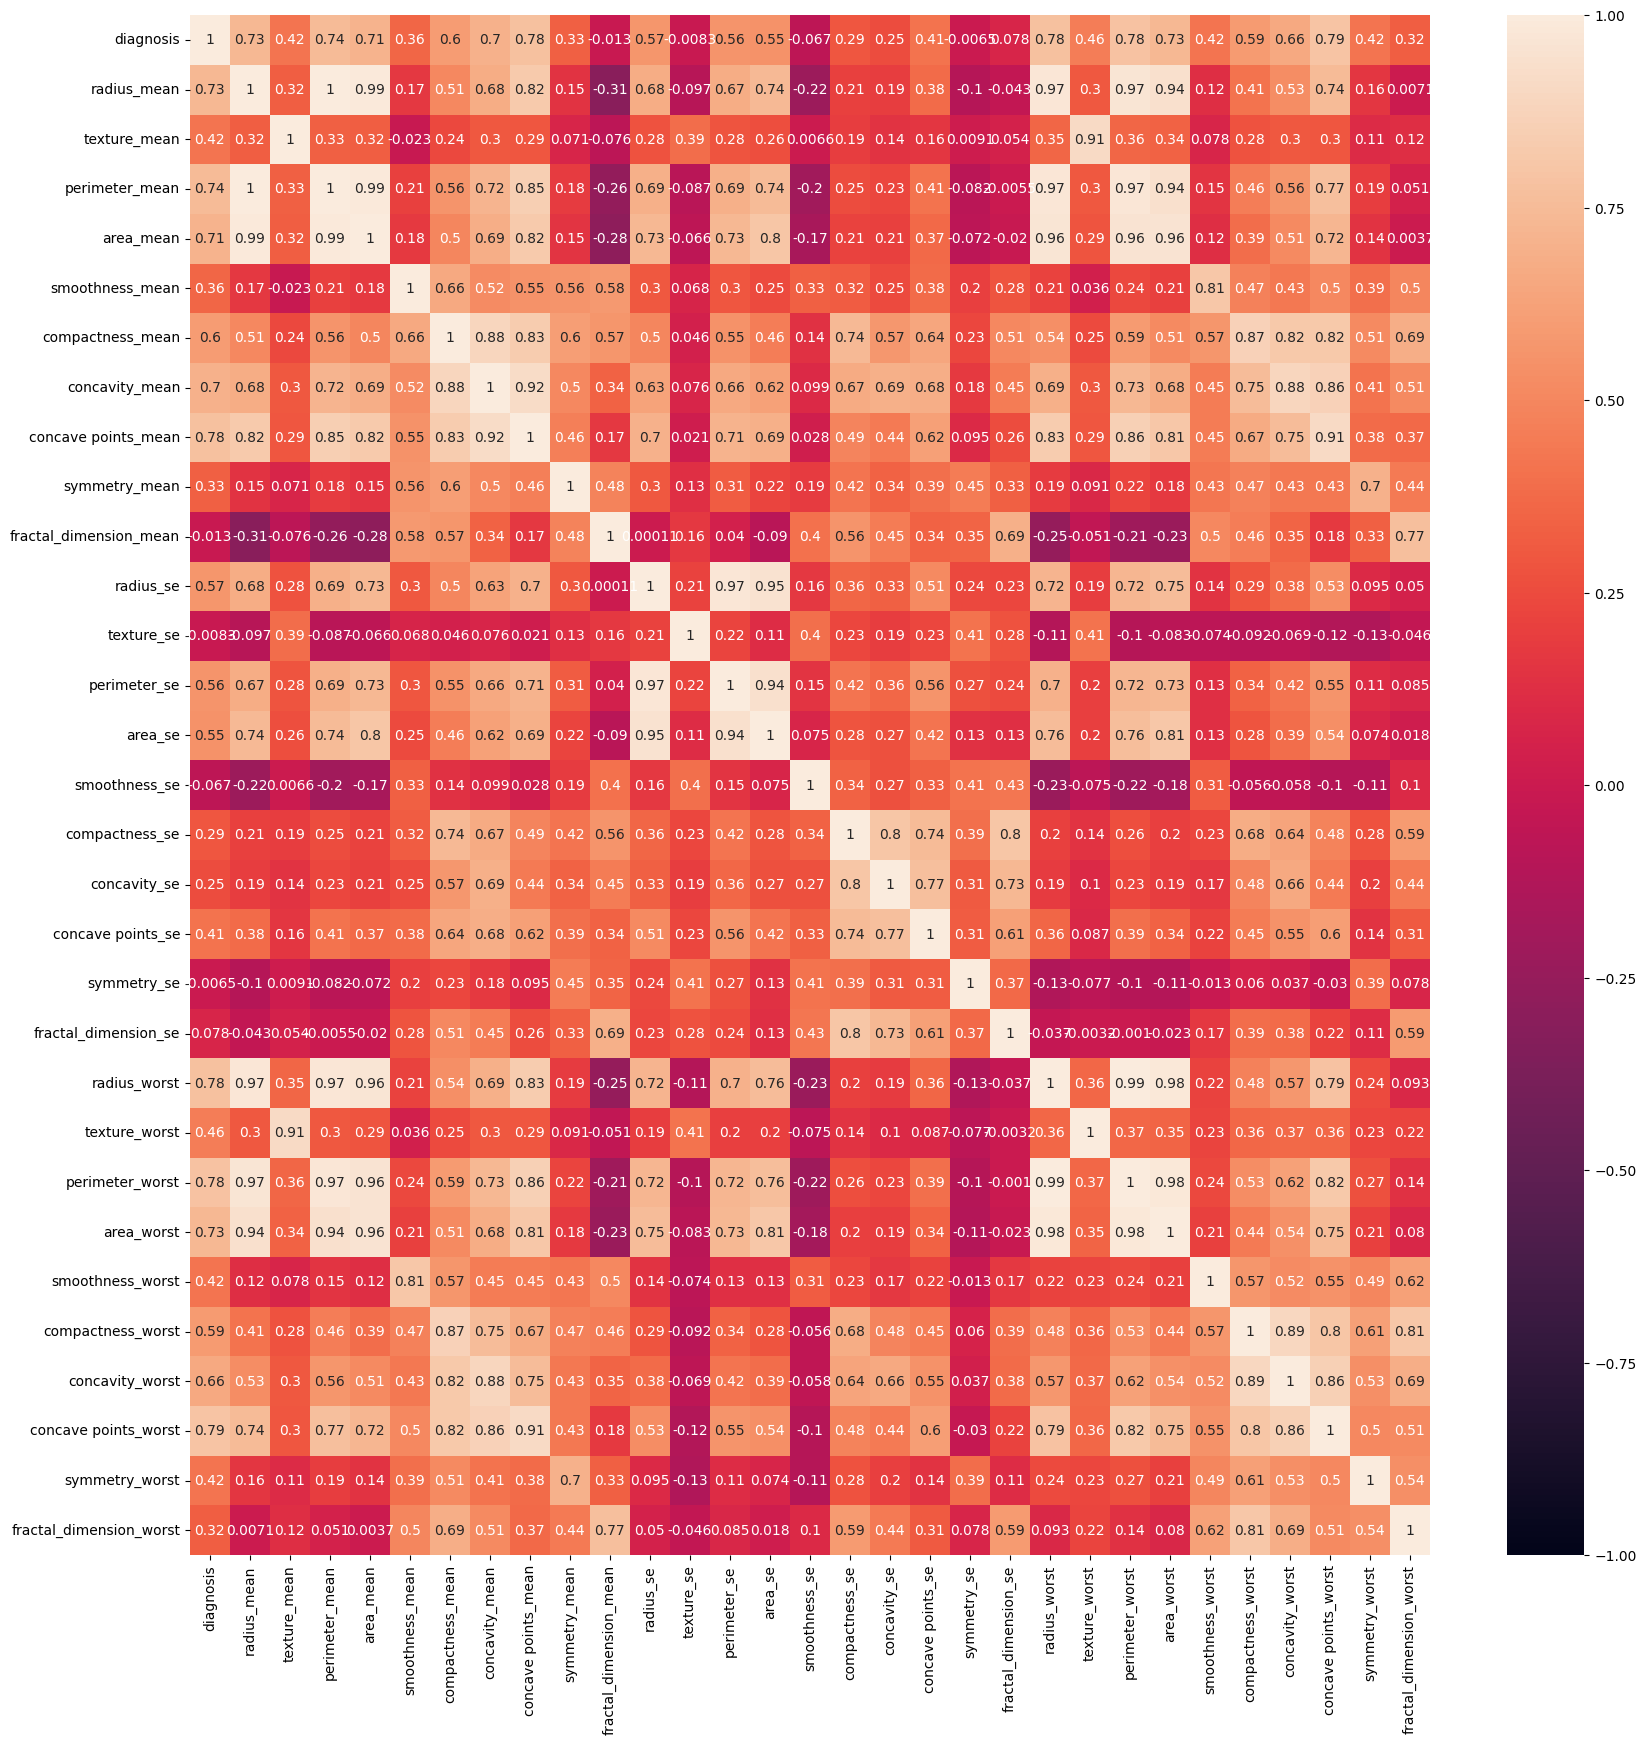

In [13]:
plt.figure(figsize =(20,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [15]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
print("Size of training set:", X_train.shape)
print("Size of test set:", X_test.shape)

Size of training set: (398, 30)
Size of test set: (171, 30)


# Parameter tuning for Decision tree

Створимо, навчимо і протестуємо модель дерева рішень із параметрами за замовчуванням, після чого обчислимо точність моделі.

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [20]:
clf_default = DecisionTreeClassifier()
clf_default.fit(X_train, y_train)
y_pred_default = clf_default.predict(X_test)
acc_default = round(metrics.accuracy_score(y_test, y_pred_default) * 100, 2)
print('Accuracy of Default Decision Tree model:', acc_default)

Accuracy of Default Decision Tree model: 91.81


Використовуємо GridSearchCV для підбору оптимальних гіперпараметрів моделі дерева рішень. Заданий набір параметрів включає різні варіанти функції розщеплення (criterion), максимальну глибину дерева, мінімальну кількість зразків для розщеплення та мінімальну кількість зразків у листі.

In [22]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf_tuned = DecisionTreeClassifier()
param_grid = {
'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(estimator=clf_tuned, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_clf = grid_search.best_estimator_
y_pred_best = best_clf.predict(X_test)
acc_tuned = round(accuracy_score(y_test, y_pred_best) * 100, 2)
print("Best Parameters:", best_params)
print("Accuracy of Optimized Decision Tree model:", acc_tuned)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of Optimized Decision Tree model: 94.15


### Аналіз результатів

- **Найкращі параметри**:
  - `criterion`: 'entropy' – функція для вимірювання якості розщеплення.
  - `max_depth`: None – без обмеження глибини дерева.
  - `min_samples_leaf`: 4 – мінімальна кількість зразків у листі.
  - `min_samples_split`: 10 – мінімальна кількість зразків для розщеплення.

- **Точність оптимізованої моделі**: 94.15%


### Порівняння результатів

- **Точність моделі за замовчуванням**: 91.81%
- **Точність оптимізованої моделі**: 94.15%

#### Висновок:
Після тюнінгу моделі за допомогою GridSearchCV точність підвищилася на 2.34%. Оптимізовані гіперпараметри покращили продуктивність дерева рішень.


## Random Forest parameter tuning

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_default = RandomForestClassifier()
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
acc_default_rf = round(accuracy_score(y_test, y_pred_default) * 100, 2)
print('Accuracy of Default Random Forest model:', acc_default_rf)

Accuracy of Default Random Forest model: 95.32


In [37]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_estimators': [4, 6, 9, 10, 15],
    'max_features': ['log2', 'sqrt'],
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5],
    'min_samples_leaf': [1, 5, 8]
}

grid_obj = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
grid_obj.fit(X_train, y_train)

best_params_rf = grid_obj.best_params_
print('Best parameters found:', best_params_rf)
rf_tuned = grid_obj.best_estimator_
rf_tuned.fit(X_train, y_train)
y_pred_tuned = rf_tuned.predict(X_test)
acc_tuned_rf = round(accuracy_score(y_test, y_pred_tuned) * 100, 2)
print('Accuracy of Tuned Random Forest model:', acc_tuned_rf)

Best parameters found: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 15}
Accuracy of Tuned Random Forest model: 96.49


### Аналіз результатів

- **Точність моделі за замовчуванням**: 95.32%
- **Найкращі знайдені параметри**:
  - `criterion`: 'entropy'
  - `max_depth`: 10
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 5
  - `min_samples_split`: 5
  - `n_estimators`: 15
- **Точність оптимізованої моделі**: 96.49%

#### Висновок:
Після тюнінгу точність моделі підвищилася з 95.32% до 96.49%. Це показує, що підбір гіперпараметрів дозволив моделі покращити свою продуктивність, хоч і незначно, але підвищив точність на 1.17%. Важливо зазначити, що добре підібрані параметри можуть покращити результати, навіть якщо початкова модель показує високу продуктивність.


## SVM parameter tuning

In [38]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
svc_default = svm.SVC()
svc_default.fit(X_train, y_train)
y_pred_default = svc_default.predict(X_test)
acc_default_svm = round(accuracy_score(y_test, y_pred_default) * 100, 2)
print('Accuracy of Default SVM model:', acc_default_svm)

Accuracy of Default SVM model: 92.4


In [39]:
from sklearn.model_selection import GridSearchCV

parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

grid_obj = GridSearchCV(svm.SVC(), parameters, cv=5)
grid_obj.fit(X_train, y_train)
best_params_svm = grid_obj.best_params_
print('Best parameters found:', best_params_svm)

svc_tuned = grid_obj.best_estimator_
svc_tuned.fit(X_train, y_train)
y_pred_tuned = svc_tuned.predict(X_test)
acc_tuned_svm = round(accuracy_score(y_test, y_pred_tuned) * 100, 2)
print('Accuracy of Tuned SVM model:', acc_tuned_svm)

Best parameters found: {'C': 1000, 'kernel': 'linear'}
Accuracy of Tuned SVM model: 94.74


### Аналіз результатів

- **Точність моделі SVM за замовчуванням**: 92.4%
- **Найкращі знайдені параметри**:
  - `C`: 1000
  - `kernel`: 'linear'
- **Точність оптимізованої моделі SVM**: 94.74%

#### Висновок:
Після тюнінгу точність SVM моделі зросла з 92.4% до 94.74%. Підбір гіперпараметрів (зокрема, збільшення параметра `C` та використання лінійного ядра) призвів до покращення точності на 2.34%. Це демонструє, що оптимізація параметрів значно вплинула на якість прогнозів моделі.

# K-Nearest Neighbors parameters tuning

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_default = KNeighborsClassifier()
knn_default.fit(X_train, y_train)
y_pred_default = knn_default.predict(X_test)
acc_default_knn = round(accuracy_score(y_test, y_pred_default) * 100, 2)

print('Accuracy of Default KNN model:', acc_default_knn)

Accuracy of Default KNN model: 94.74


In [41]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': [3, 4, 5, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 50]
}
grid_obj = GridSearchCV(KNeighborsClassifier(), parameters, cv=5)
grid_obj.fit(X_train, y_train)
best_params_knn = grid_obj.best_params_
print('Best parameters found:', best_params_knn)

knn_tuned = grid_obj.best_estimator_
knn_tuned.fit(X_train, y_train)
y_pred_tuned = knn_tuned.predict(X_test)
acc_tuned_knn = round(accuracy_score(y_test, y_pred_tuned) * 100, 2)
print('Accuracy of Tuned KNN model:', acc_tuned_knn)

Best parameters found: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 10, 'weights': 'distance'}
Accuracy of Tuned KNN model: 95.32


/Users/geofarl/Desktop/Навчання/ПІІС/code/venv/lib/python3.11/site-packages/numpy/ma/core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


### Аналіз результатів

- **Точність моделі KNN за замовчуванням**: 94.74%
- **Найкращі знайдені параметри**:
  - `algorithm`: 'auto'
  - `leaf_size`: 10
  - `n_neighbors`: 10
  - `weights`: 'distance'
- **Точність оптимізованої моделі KNN**: 95.32%

#### Висновок:
Після тюнінгу точність KNN моделі підвищилася з 94.74% до 95.32%, що свідчить про покращення на 0.58%. Оптимізація таких параметрів, як кількість сусідів (`n_neighbors=10`) та використання вагової функції `weights='distance'`, призвела до невеликого, але позитивного впливу на точність моделі.


## Ensembling using voting classifier

In [43]:
from sklearn.ensemble import VotingClassifier

rf_model = RandomForestClassifier(n_estimators=15, max_depth=10, criterion='entropy', max_features='sqrt', 
                                  min_samples_leaf=5, min_samples_split=5)
svm_model = svm.SVC(C=1000, kernel='linear', probability=True)
knn_model = KNeighborsClassifier(n_neighbors=10, weights='distance', leaf_size=10, algorithm='auto')

voting_clf = VotingClassifier(
    estimators=[('rf', rf_model), ('svm', svm_model), ('knn', knn_model)],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

y_pred_ensemble = voting_clf.predict(X_test)
acc_ensemble = round(accuracy_score(y_test, y_pred_ensemble) * 100, 2)
print(f"Accuracy of Voting Classifier ensemble model: {acc_ensemble}")

Accuracy of Voting Classifier ensemble model: 98.25


# Boosting with AdaBoost and GradientBoosting

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

base_model = DecisionTreeClassifier(max_depth=1)

adaboost_model = AdaBoostClassifier(estimator=base_model, n_estimators=50, learning_rate=1.0)

adaboost_model.fit(X_train, y_train)

y_pred_boost = adaboost_model.predict(X_test)
acc_boost = round(accuracy_score(y_test, y_pred_boost) * 100, 2)
print(f"Accuracy of AdaBoost model: {acc_boost}")

Accuracy of AdaBoost model: 96.49


/Users/geofarl/Desktop/Навчання/ПІІС/code/venv/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [46]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
acc_gb = round(accuracy_score(y_test, y_pred_gb) * 100, 2)
print(f"Accuracy of Gradient Boosting model: {acc_gb}")

Accuracy of Gradient Boosting model: 96.49


### Висновок

#### 1. **Ансамблі та бустинг**

У цьому проєкті були реалізовані ансамблеві методи та бустинг:

- **AdaBoost**:
  - Використовує адаптивний підхід для корекції помилок попередніх моделей шляхом зміни ваг спостережень. Модель має точність **96.49%**.
  - Основний принцип: наступні моделі концентруються на складних випадках, які були неправильно класифіковані попередніми моделями.

- **Gradient Boosting**:
  - Мінімізує помилки кожної наступної моделі шляхом фітингу на залишкові помилки попередніх моделей. Точність цієї моделі склала **96.49%**.
  - Підхід: на кожній ітерації нова модель намагається виправити помилки, зроблені попередніми моделями.

- **Voting Classifier (ансамбль моделей)**:
  - Поєднує різні моделі (Random Forest, SVM, KNN) за допомогою голосування. Точність ансамблевого методу становила **98.25%**.
  - Перевага в тому, що різні моделі компенсують слабкі місця одна одної, що дозволяє досягти вищої точності.

#### 2. **Відмінності між бустингом та ансамблями**

- **AdaBoost та Gradient Boosting**:
  - Це методи **послідовного** бустингу, де кожна нова модель навчається на помилках попередньої.
  - **AdaBoost** концентрується на вагових коефіцієнтах спостережень, тоді як **Gradient Boosting** працює з градієнтами залишкових помилок.
  - Gradient Boosting зазвичай більш потужний і гнучкий, що дозволяє досягти кращих результатів на складних задачах, тоді як AdaBoost може бути швидшим для простих моделей.

- **Ансамблі (Voting Classifier)**:
  - Ансамблі використовують **паралельне** поєднання декількох моделей (напр. Random Forest, SVM, KNN) і комбінують їх результати для отримання кінцевого прогнозу.
  - Ансамблеві методи часто працюють краще, оскільки різні моделі компенсують слабкі сторони одна одної.

#### 3. **Порівняння з простим тюнингом**

Тюнинг (налаштування гіперпараметрів) дозволяє покращити продуктивність окремої моделі, проте:

- Тюнингова версія Random Forest дала точність **95.32%**, що поступається результатам як Gradient Boosting, так і Voting Classifier.
- Тюнинг моделей важливий для досягнення хороших результатів, але комбінування моделей (як у випадку ансамблю) дозволяє досягти ще кращих результатів, ніж окремо тюнінговані моделі.

#### 4. **Коли і що використовувати**

- **AdaBoost**:
  - Краще використовувати на простих задачах або при обмежених ресурсах, оскільки AdaBoost швидший і простіший.
  - Чутливий до шуму в даних, тому може не підійти для складних або "брудних" наборів даних.

- **Gradient Boosting**:
  - Варто використовувати для складних задач із великою кількістю ознак і даних. Gradient Boosting більш стійкий і точний, особливо в задачах з великою кількістю ознак.
  - Часто використовується в змаганнях з машинного навчання (наприклад, Kaggle) завдяки високій продуктивності.

- **Ансамблеві моделі (Voting Classifier)**:
  - Підходять для випадків, коли жодна з окремих моделей не дає хорошого результату, і вам потрібно поєднати кілька моделей для покращення точності.
  - Рекомендується використовувати, якщо у вас є доступ до різних сильних моделей (наприклад, Random Forest, SVM, KNN), і ви хочете скористатися їх комбінованою силою.

#### Загальний висновок:
Для досягнення максимальної продуктивності, як показав цей проєкт, **Voting Classifier** (ансамблевий метод) є найкращим рішенням, забезпечуючи точність **98.25%**. Однак, для задач із великою кількістю ознак або складних даних **Gradient Boosting** також показує чудові результати. Тюнинг окремих моделей допомагає досягти хороших результатів, але ансамблі або бустинг можуть значно покращити продуктивність за рахунок поєднання сильних сторін кількох підходів.
